In [1]:
clear all
cd "/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oligarchy/Data/Boards 2000 to 2017"
set scheme plotplain
use forbes400_alum_board_1989_2003_2017, clear
*egen pehedge=rowtotal(pe hedge)
replace financedetail="non-financial" if financedetail==" non-financial"
gen nonfin=(financedetail=="non-financial" & technology!=1)



/Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New Financial Oliga
> rchy/Data/Boards 2000 to 2017



(646 real changes made)



In [2]:
gen ob=1
collapse (sum) pehedge otherfin nonfin tech ob, by(year)
gen totalfin=pehedge +otherfin 

In [3]:
foreach var in pehedge otherfin totalfin tech {
    replace `var'=`var' / ob * 100
}


(3 real changes made)
(3 real changes made)
(3 real changes made)
(3 real changes made)


In [4]:
label var pehedge "private equity & hedge"
label var otherfin "other finance"
label var technology "technology"
label var totalfin "total finance"

In [6]:
list


     +----------------------------------------------------------------+
     | year   pehedge   otherfin   nonfin   techno~y    ob   totalfin |
     |----------------------------------------------------------------|
  1. | 1989      5.25       7.25      334          4   400       12.5 |
  2. | 2003      10.5      10.75      275         10   400      21.25 |
  3. | 2017     16.25       8.75      245      13.75   400         25 |
     +----------------------------------------------------------------+


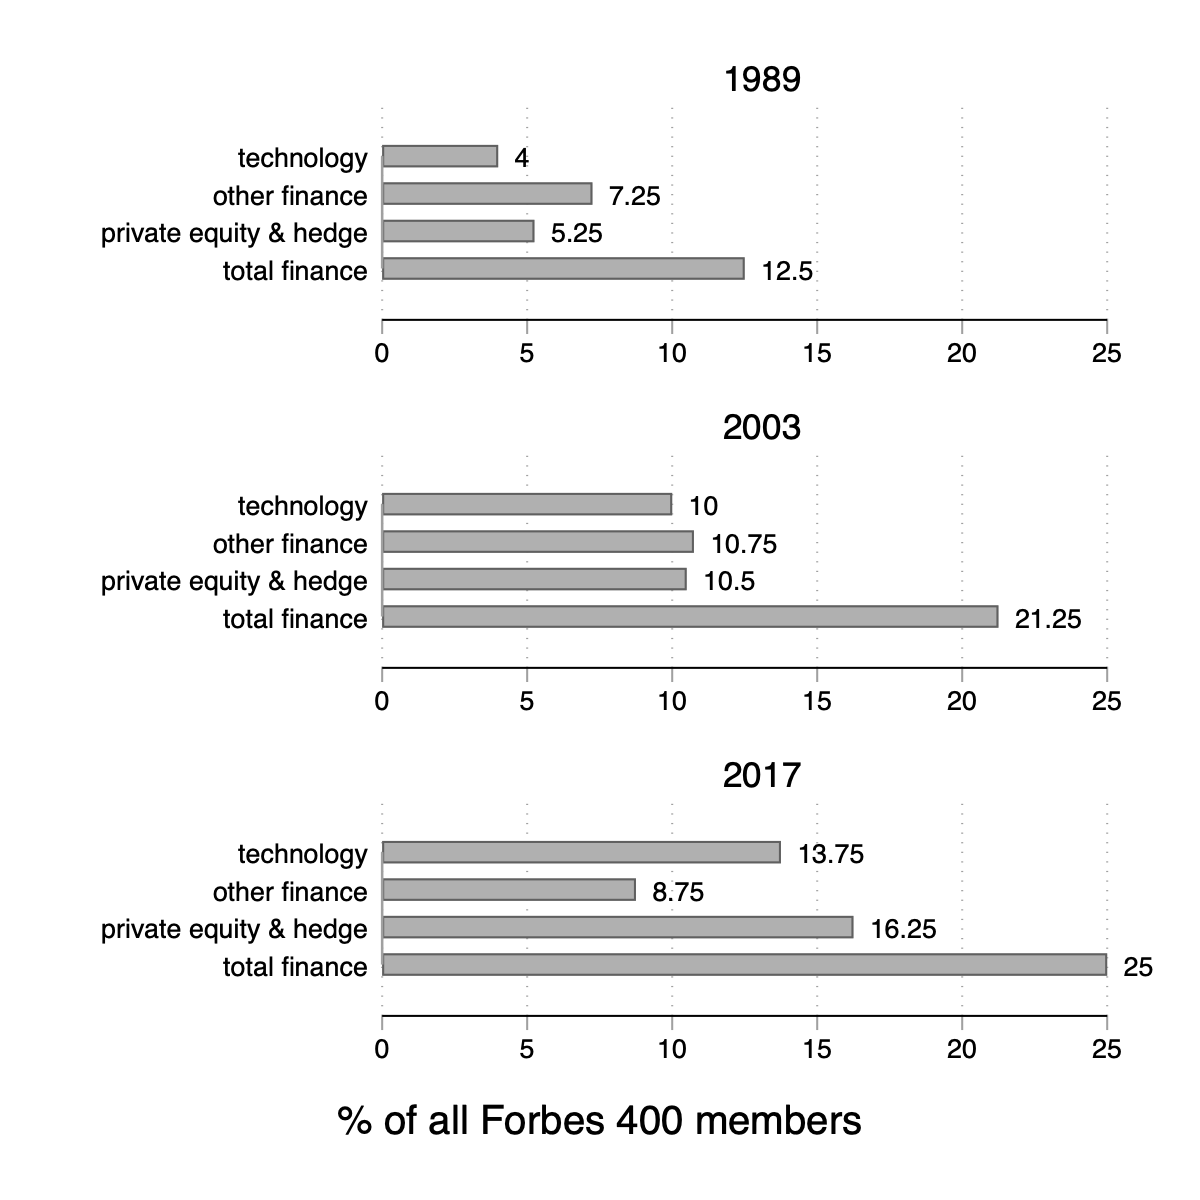

In [5]:
statplot tech otherfin pehedge totalfin, by(year, cols(1) note("") ixaxes ) name(Forbes_industry, replace) ///
ytitle("% of all Forbes 400 members") subtitle(, nobox)   ysize(6) blabel(bar)

graph display

In [52]:
graph export F1_Forbes_400_origin20190107.pdf, replace
graph export F1_Forbes_400_origin20190107.svg, replace


(file F1_Forbes_400_origin20190107.pdf written in PDF format)

(file F1_Forbes_400_origin20190107.svg written in SVG format)


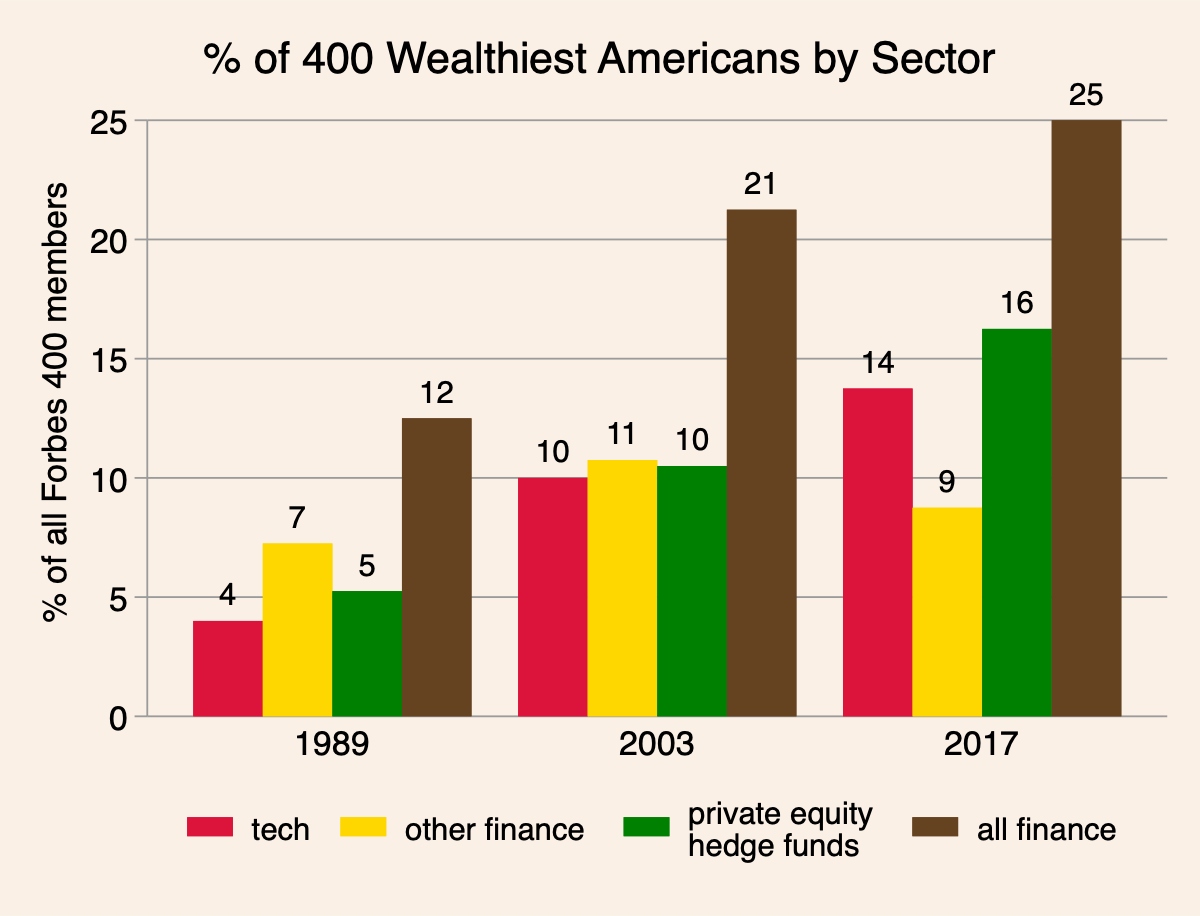




file /Users/Charlie/Dropbox/Bankers in the Ivory Tower Book/2 Our New
    Financial Oligarchy/Data/Boards 2000 to 2017/f1_forbes_400_dubois.png
    saved as PNG format


In [44]:
graph bar tech otherfin pehedge totalfin, over(year, label(labsize(medium))) name(Forbes_industry, replace) ///
ytitle("% of all Forbes 400 members", size(medium)) subtitle(, nobox) xsize(10) ///
blabel(bar, size(medsmall) format(%2.0f)) scheme(dubois) ylabel(, labsize(medium)) ///
title("% of 400 Wealthiest Americans by Sector", size(large)) /// 
legend(pos(6) size(medsmall) col(4) label(1 "tech") label(2 "other finance") label(3 "private equity" "hedge funds") label(4 "all finance"))

graph export f1_forbes_400_dubois.png, replace